In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

12.814103 seconds


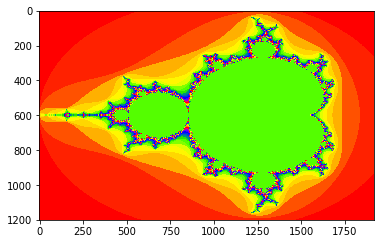

In [2]:
def mandelbrot( w, h, maxiter=200 ):
    y, x = np.ogrid[ -1.2:1.2:h*1j, -2:0.8:w*1j ]
    C = x + y * 1j
    Z = np.zeros(C.shape, dtype=int)
    N = maxiter + Z
    bailout = 2.0
    
    for i in range(maxiter):
        Z = Z ** 2 + C
        diverged = np.abs(Z) > bailout
        N[diverged & (N==maxiter)] = i
        Z[diverged] = 2
    return N

# plt.imshow(mandelbrot(1920,1200), cmap='tab20c')
t1 = datetime.datetime.now()
plt.imshow(mandelbrot(1920,1200), cmap='prism')
t2 = datetime.datetime.now()
runtime1 = (t2-t1).total_seconds() 
print(str(runtime1) + " seconds")
# plt.savefig('mandelbrot1.png', dpi=300)
plt.show()

9.18136 seconds


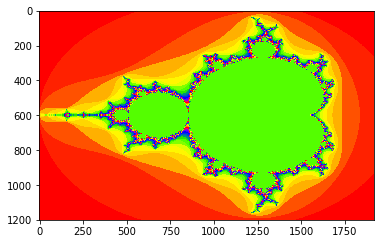

In [3]:
def mandelbrot( w, h, maxiter=200 ):
    y, x = np.ogrid[ -1.2:1.2:h*1j, -2:0.8:w*1j ]
    C = x + y * 1j
    Z = np.zeros(C.shape, dtype=complex)
    M = np.full(C.shape, True, dtype=bool)
    N = np.zeros(C.shape)
    bailout = 2.0
    
    for i in range(maxiter):
        Z[M] = Z[M] ** 2 + C[M]
        diverged = np.abs(Z) > bailout
        M[diverged] = False
        N[M] = i+1
    return N

# plt.imshow(mandelbrot(1920,1200), cmap='tab20c')
t1 = datetime.datetime.now()
plt.imshow(mandelbrot(1920,1200), cmap='prism')
t2 = datetime.datetime.now()
runtime2 = (t2-t1).total_seconds() 
print(str(runtime2) + " seconds")
# plt.savefig('mandelbrot2.png', dpi=300)
plt.show()

In [4]:
print("Delta absolute:" + str(runtime1-runtime2) + " seconds")
print("Delta relative:" + str(runtime2/runtime1*100) + " %")

Delta absolute:3.6327429999999996 seconds
Delta relative:71.65043077927498 %
